In [5]:
#usiamo scipy.stats per le definizioni di distribuzione esponenziale e binomiale (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html & https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) :
from scipy.stats import poisson,binom,expon
#importiamo matplotlib e math:
import matplotlib.pyplot as plt
import math

In [6]:
#prendiamo il flusso totale al livello del mare al di sopra di 10 GeV (https://www.diva-portal.org/smash/get/diva2:1597287/FULLTEXT01.pdf):
#il flusso integrale è ordine di 10-3 [cm-2 s-1 sr-1]:
I_0=0.001

#va integrato nell'angolo di zenith per i muoni!
#per ora consideriamo un angolo solido totale (2 pigreco, ma ci torneremo...)
#consideriamo un rivelatore a dimensione variabile, per esempio un quadrato di lato l = 10 cm

#scriviamo

omega=2*math.pi
area=100 # in cm^2
hours=1
t_data=hours*3600

muon_rate=I_0*omega*t_data*area

print(" il rate di muoni in "+str(hours)+" ore è: "+str(muon_rate))

 il rate di muoni in 1 ore è: 2261.946710584651


In [8]:
#al di sopra di 10 GeV i muoni cosmici hanno una disctirbuzione in energia che è un esponenziale decrescente
#Consideriamo per semplicità un esponenziale decrescente con "vita media" 50 GeV:
e1 = expon(scale=50,loc=10) #nota bene: in realtà dovremmo definirla solo al di sopra di 10 GeV, teniamo questa come prima approssimazione
#(1/scale)*  e-((x-loc)/scale) --> scale è l'equivalente di 'tau', la vita media, loc è il punto di partenza

#generiamo ad esempio il numero di muoni cosmici previsto sopra (rvs-Random variates: rvs(loc=0, scale=1, size=1, random_state=None) ):
energies = e1.rvs(size=int(muon_rate))
print(energies)

[ 36.95609669  75.82041503  75.68379744 ... 118.21837582  12.06686404
  74.59428452]


In [ ]:
len(energies)

2261

Text(0, 0.5, 'CR - Flux')

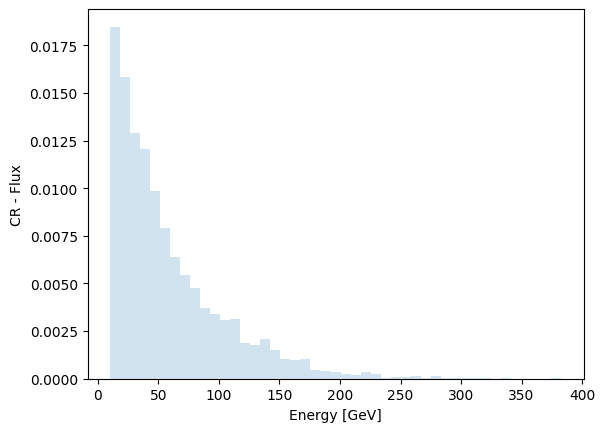

In [9]:
fig,ax= plt.subplots()
#properties of histos: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
ax.hist(energies, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('CR - Flux')
#plt.show()

Il numero di conteggi atteso e' pari a  2261


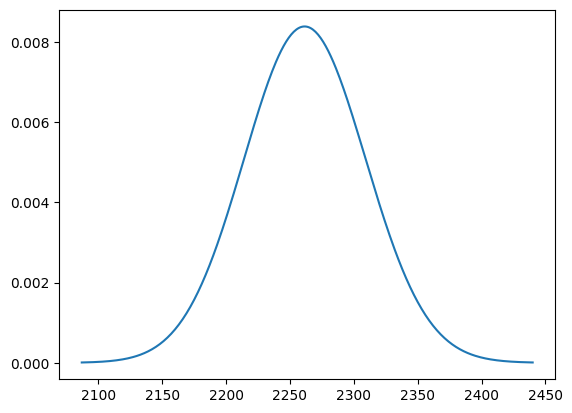

In [10]:
import numpy as np
muon_prob = poisson(muon_rate)
ndatasets=10000

print("Il numero di conteggi atteso e' pari a ",int(muon_rate))
#x= np.arange(muon_prob.ppf(0.01),muon_prob.ppf(0.99))
#Percent point function (inverse of cdf — percentiles): ppf
x= np.arange(muon_prob.ppf(1.0/ndatasets),muon_prob.ppf(1-1.0/ndatasets))
#Probability mass function: pmf
y=muon_prob.pmf(x)
fig2, axs = plt.subplots()
axs.plot(x,y)

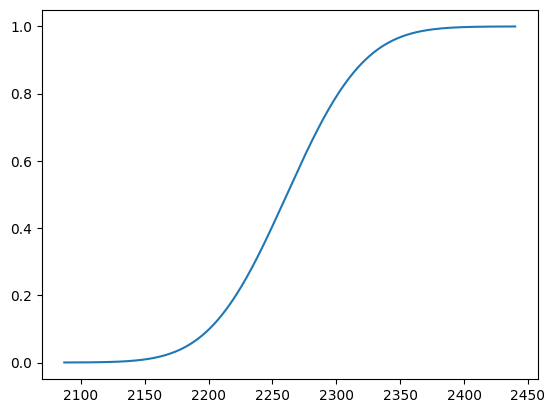

In [ ]:
# Cumulative distribution function: cdf
y = poisson.cdf(x, muon_rate, 0)
plt.plot(x, y)
plt.show()
